In [35]:
import os
import sys
import pandas as pd
sys.path.append('../')
from predictor.physicochemical import calculate_physchem_prop
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df_dbaasp = pd.read_csv('../data/dbaasp/fine_tune_activity.csv')
df_dbaasp = df_dbaasp.query('activity == 1')
df_amp = pd.read_csv('../data/hydramp/unlabelled_positive.csv')
df_grampa = pd.read_csv('../data/grampa.csv')


df_dbaasp['db'] = 'dbaasp'
df_amp['db'] = 'amp'
df_grampa['db'] = 'grampa'

In [25]:
def regularize_sequence(df, seq_col='Sequence'):
    df[seq_col] = df[seq_col].apply(lambda x:x.upper())

    return df

In [26]:
def add_pc_to_df(df, seq_col='Sequence'):
    seqs = df[seq_col].to_list()
    pc_dict = calculate_physchem_prop(seqs)    
    for pc_name, pc_vals in pc_dict.items():
        df[pc_name] = pc_vals
    
    return df

In [27]:
df_dbaasp = regularize_sequence(df_dbaasp)

In [28]:
df_amp = add_pc_to_df(df_amp)
df_dbaasp = add_pc_to_df(df_dbaasp)
#df_grampa = add_pc_to_df(df_grampa, seq_col='sequence')

In [29]:
df_joined = pd.concat([
    df_amp,
    df_dbaasp
], axis=0)

In [31]:
pc_cols = ['length','hydrophobicity','hydrophobic_moment','charge','isoelectric_point']

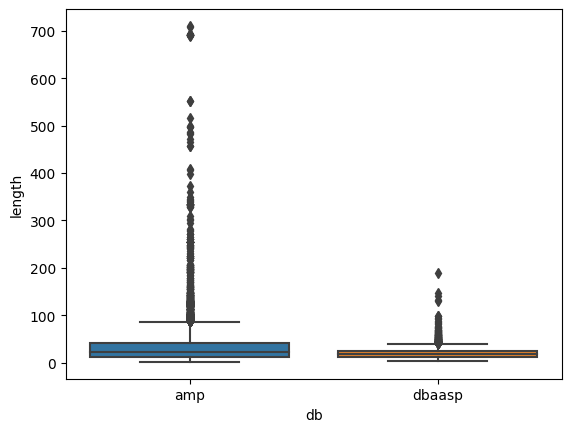

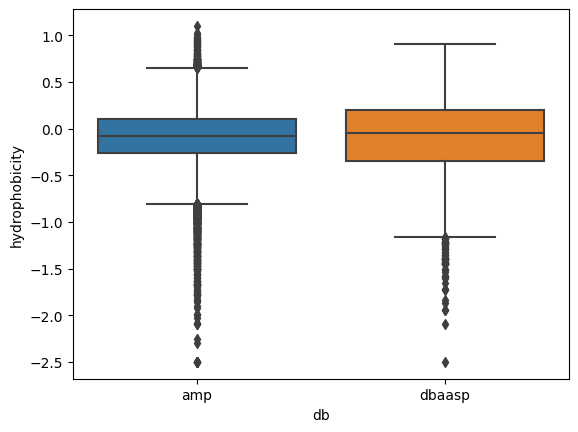

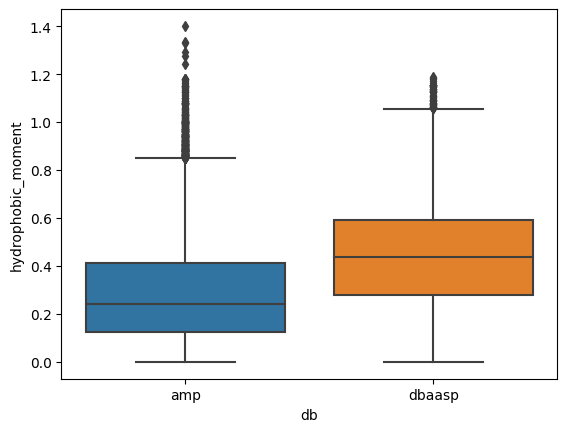

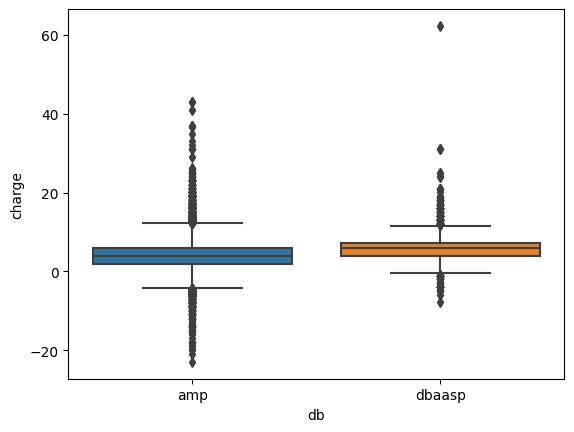

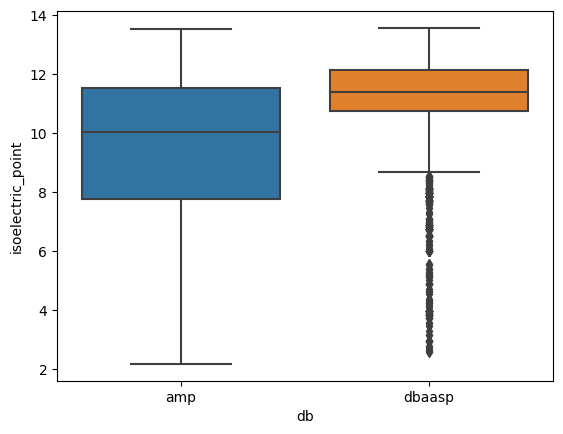

In [37]:
for pc_col in pc_cols:
    plt.figure()
    sns.boxplot(data=df_joined, x="db", y=pc_col)
    # break

In [45]:
df_joined.groupby('db')[pc_cols[0]].describe()    

,count,mean,std,min,25%,50%,75%,max
db,,,,,,,,
amp,20313.0,33.342588,36.774125,2.0,12.0,23.0,42.0,710.0
dbaasp,4774.0,19.920612,10.500795,3.0,13.0,18.0,24.0,190.0


In [46]:
df_joined.groupby('db')[pc_cols[1]].describe()    

,count,mean,std,min,25%,50%,75%,max
db,,,,,,,,
amp,20313.0,-0.097064,0.332121,-2.5,-0.258065,-0.074500,0.106667,1.1000
dbaasp,4774.0,-0.090353,0.401970,-2.5,-0.345000,-0.048824,0.196923,0.9025


In [47]:
df_joined.groupby('db')[pc_cols[2]].describe()    

,count,mean,std,min,25%,50%,75%,max
db,,,,,,,,
amp,20313.0,0.291402,0.210223,5.242720e-17,0.124289,0.239702,0.414446,1.400997
dbaasp,4774.0,0.451417,0.228031,7.618362e-17,0.280315,0.436959,0.591116,1.187655


In [48]:
df_joined.groupby('db')[pc_cols[3]].describe()    

,count,mean,std,min,25%,50%,75%,max
db,,,,,,,,
amp,20313.0,3.978476,4.153387,-22.971,1.861,3.9960,5.995,42.987
dbaasp,4774.0,5.859261,3.270847,-7.883,3.995,5.8605,7.094,62.286


In [50]:
df_amp.Name.to_list()

['DRAMP00005',
 'DRAMP00017',
 'DRAMP00032',
 'DRAMP00063',
 'DRAMP00068',
 'DRAMP00069',
 'DRAMP00074',
 'DRAMP00089',
 'DRAMP00090',
 'DRAMP00105',
 'DRAMP00106',
 'DRAMP00107',
 'DRAMP00126',
 'DRAMP00127',
 'DRAMP00128',
 'DRAMP00129',
 'DRAMP00136',
 'DRAMP00171',
 'DRAMP00173',
 'DRAMP00177',
 'DRAMP00178',
 'DRAMP00189',
 'DRAMP00190',
 'DRAMP00191',
 'DRAMP00201',
 'DRAMP00204',
 'DRAMP00218',
 'DRAMP00222',
 'DRAMP00232',
 'DRAMP00254',
 'DRAMP00275',
 'DRAMP00336',
 'DRAMP00337',
 'DRAMP00338',
 'DRAMP00384',
 'DRAMP00385',
 'DRAMP00416',
 'DRAMP00417',
 'DRAMP00422',
 'DRAMP00423',
 'DRAMP00425',
 'DRAMP00431',
 'DRAMP00436',
 'DRAMP00437',
 'DRAMP00450',
 'DRAMP00454',
 'DRAMP00764',
 'DRAMP00765',
 'DRAMP00766',
 'DRAMP00774',
 'DRAMP00795',
 'DRAMP00798',
 'DRAMP00856',
 'DRAMP00877',
 'DRAMP00878',
 'DRAMP01374',
 'DRAMP01373',
 'DRAMP01372',
 'DRAMP00933',
 'DRAMP01004',
 'DRAMP01012',
 'DRAMP01016',
 'DRAMP01017',
 'DRAMP01018',
 'DRAMP01061',
 'DRAMP18193',
 'DRAMP010